# Identificar fronteras lineales

In [1]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = make_circles(100, factor=0.1, noise=0.1)

In [3]:
def plt_svc(model, ax=None, plot_support=True):
    """
    Plot de la función de decisión para una clasificación en 2D con SVC
    """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors="blue")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

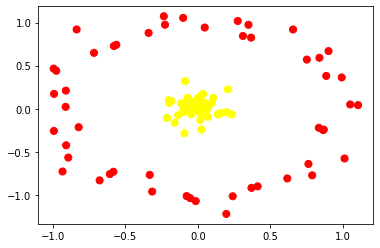

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt.show()

In [5]:
from sklearn.svm import SVC

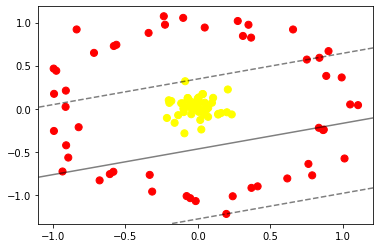

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X, Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.29571753, 0.44643104, 0.42083573, 0.99581188, 0.33990395,
       0.44520355, 0.34302145, 0.44264325, 0.41811688, 0.99283804,
       0.41086587, 0.39375071, 0.21353829, 0.34967437, 0.31682072,
       0.49694854, 0.9139382 , 0.9938525 , 0.29501839, 0.48620425,
       0.36336677, 0.98300004, 0.44388062, 0.42125545, 0.99723956,
       0.32609693, 0.32803315, 0.94268892, 0.31720063, 0.99645783,
       0.41124993, 0.21698831, 0.2994494 , 0.95896965, 0.35586148,
       0.98601549, 0.89634633, 0.97036995, 0.98277945, 0.99607383,
       0.99596153, 0.47498332, 0.99199885, 0.97996205, 0.99009752,
       0.9513817 , 0.41726843, 0.38930863, 0.94308929, 0.99698078,
       0.99864542, 0.35547465, 0.31777582, 0.3754305 , 0.99857714,
       0.98623702, 0.24647709, 0.32665923, 0.32918243, 0.25775692,
       0.41102899, 0.3712403 , 0.9489564 , 0.97336767, 0.99165577,
       0.98764094, 0.27931618, 0.29988283, 0.36756701, 0.95775626,
       0.33131823, 0.99385284, 0.97628128, 0.39533271, 0.99593

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90, -60, -30, 0, 30, 60, 90],
         azim=[-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180],
         X=fixed(X), Y=fixed(Y), r = fixed(r))
plt.show()

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

In [13]:
rbf = SVC(kernel="rbf", C=1e6)
rbf.fit(X, Y)

SVC(C=1000000.0)

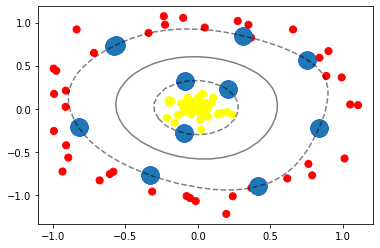

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1], s=300, lw=1)
plt.show()

# Ajustar los parámetros de SVM

In [15]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

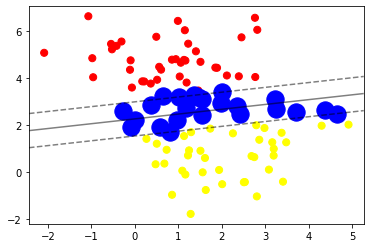

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X, Y)
plt_svc(model)
plt.show()

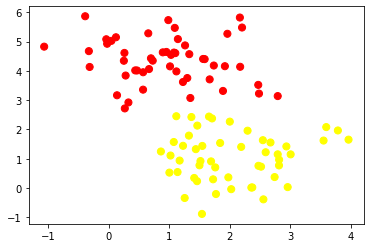

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt.show()

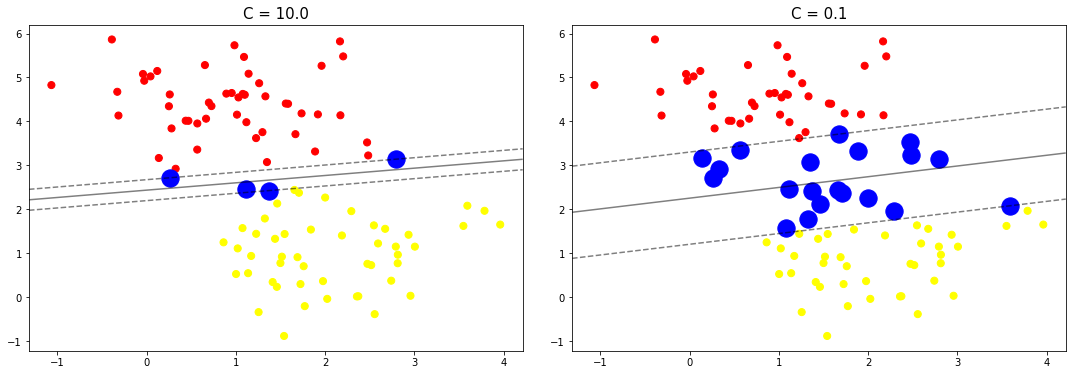

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X, Y)
    ax_i.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size=15)